In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display all columns
print("Columns:\n", df.columns.tolist())

# Display the first 5 and last 5 rows
print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Last 5 rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1 

In [18]:
# Check for missing values
print("\nMissing values before imputation:")
print(df.isnull().sum())

# Fill missing values with mean
df_filled = df.fillna(df.mean(numeric_only=True))

# Missing values after imputation
print("\nMissing values after imputation:")
print(df_filled.isnull().sum())



Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [19]:
# Checking shape before removing outliers
print("\nData shape before removing outliers:", df_filled.shape)

# We'll use IQR method on 'chol' column
Q1 = df_filled['chol'].quantile(0.25)
Q3 = df_filled['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df_filled[(df_filled['chol'] >= lower_bound) & (df_filled['chol'] <= upper_bound)]

# Checking shape after removing outliers
print("\nData shape after removing outliers:", df_no_outliers.shape)



Data shape before removing outliers: (1025, 14)

Data shape after removing outliers: (1009, 14)


In [20]:
# Use the cleaned dataset
df_clean = df_no_outliers

# Mean, Median, Std Dev of Cholesterol
chol_mean = df_clean['chol'].mean()
chol_median = df_clean['chol'].median()
chol_std = df_clean['chol'].std()

print(f"Cholesterol - Mean: {chol_mean:.2f}, Median: {chol_median:.2f}, Std Dev: {chol_std:.2f}")

# Mean Blood Pressure for patients with and without heart disease
trestbps_mean_disease = df_clean[df_clean['target'] == 1]['trestbps'].mean()
trestbps_mean_no_disease = df_clean[df_clean['target'] == 0]['trestbps'].mean()

print(f"Mean Blood Pressure (With Disease): {trestbps_mean_disease:.2f}")
print(f"Mean Blood Pressure (Without Disease): {trestbps_mean_no_disease:.2f}")

# Max and Min values for Maximum Heart Rate
thalach_max = df_clean['thalach'].max()
thalach_min = df_clean['thalach'].min()

print(f"Maximum Heart Rate - Max: {thalach_max}, Min: {thalach_min}")


Cholesterol - Mean: 242.98, Median: 239.00, Std Dev: 45.39
Mean Blood Pressure (With Disease): 129.20
Mean Blood Pressure (Without Disease): 133.98
Maximum Heart Rate - Max: 202, Min: 71


In [21]:
# Convert necessary columns to NumPy arrays
chol_np = df_clean['chol'].values
age_np = df_clean['age'].values
restecg_np = df_clean['restecg'].values

# Sort patients by cholesterol levels
chol_sorted_indices = np.argsort(chol_np)
df_sorted_by_chol = df_clean.iloc[chol_sorted_indices]
print("\nPatients sorted by cholesterol:")
print(df_sorted_by_chol[['age', 'chol']].head())

# Find patients with cholesterol > 300
high_chol_patients = df_clean[df_clean['chol'] > 300]
print(f"\nNumber of patients with cholesterol > 300: {high_chol_patients.shape[0]}")

# Find patients older than 60 with abnormal ECG (restecg > 0)
elderly_abnormal_ecg = df_clean[(df_clean['age'] > 60) & (df_clean['restecg'] > 0)]
print(f"\nPatients > 60 years old with abnormal ECG: {elderly_abnormal_ecg.shape[0]}")



Patients sorted by cholesterol:
     age  chol
101   57   126
475   57   126
336   57   126
32    57   131
882   57   131

Number of patients with cholesterol > 300: 130

Patients > 60 years old with abnormal ECG: 120


In [22]:
# Convert DataFrame to NumPy array
data_np = df_clean.to_numpy()

# Reshape the data (example: keeping original shape)
reshaped_data = data_np.reshape(-1, data_np.shape[1])
print("\nData reshaped (same shape):", reshaped_data.shape)

# Split the data into 3 approximately equal parts
split_data = np.array_split(reshaped_data, 3)

print("\nShapes of split data parts:")
for i, part in enumerate(split_data):
    print(f"Part {i+1}: {part.shape}")



Data reshaped (same shape): (1009, 14)

Shapes of split data parts:
Part 1: (337, 14)
Part 2: (336, 14)
Part 3: (336, 14)


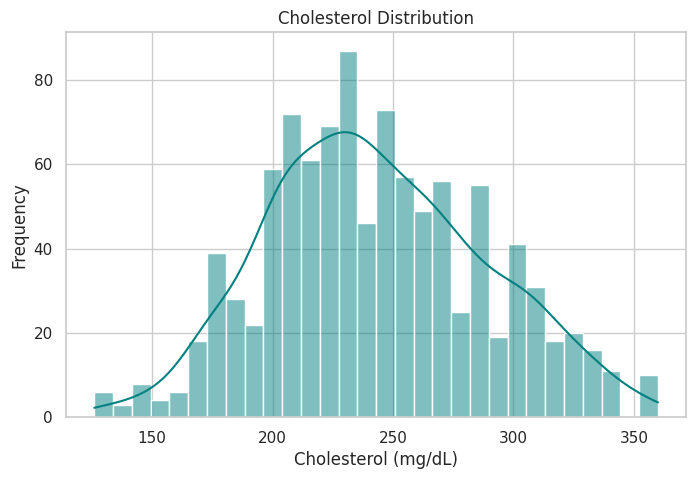

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['chol'], kde=True, color='teal', bins=30)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()


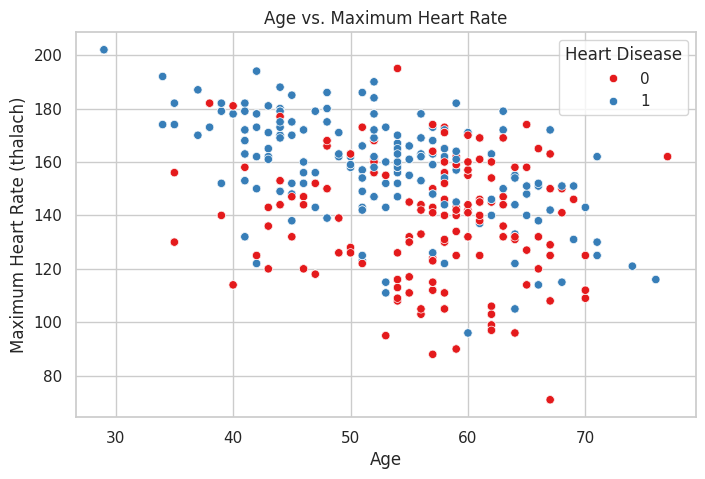

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='age', y='thalach', hue='target', palette='Set1')
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease')
plt.show()


<ipython-input-25-e5907881839e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='target', palette='Set2')


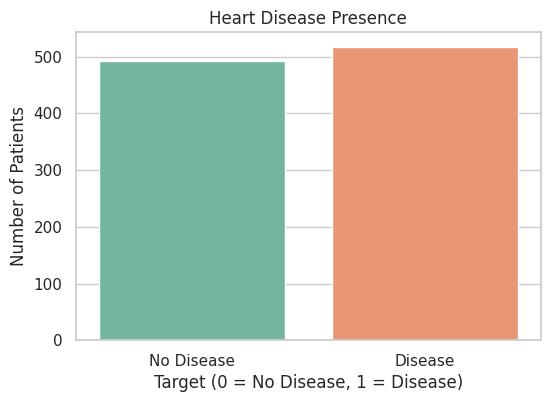

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='target', palette='Set2')
plt.title('Heart Disease Presence')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


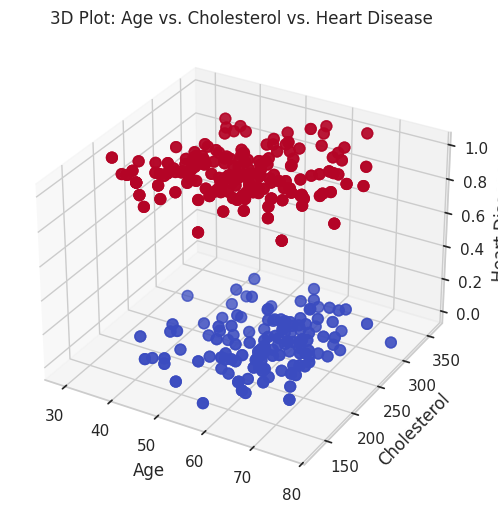

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = df_clean['age']
y = df_clean['chol']
z = df_clean['target']

scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', s=60)

ax.set_title('3D Plot: Age vs. Cholesterol vs. Heart Disease')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Disease')

plt.show()


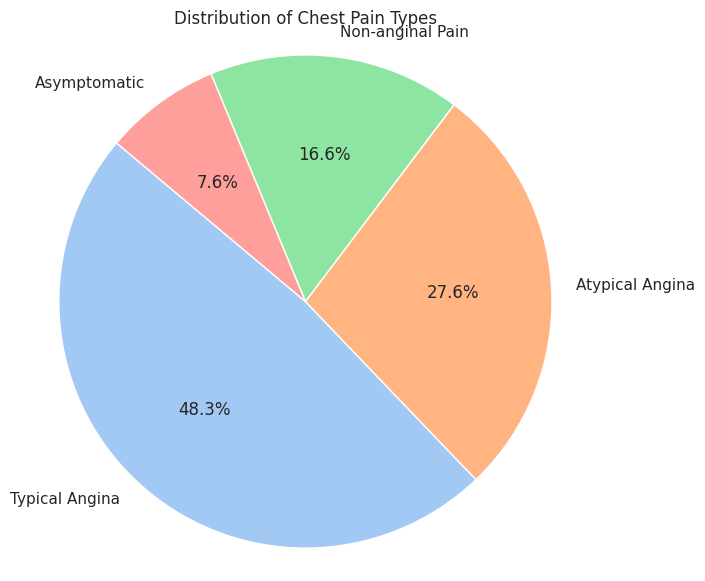

In [27]:
# Count chest pain types
cp_counts = df_clean['cp'].value_counts()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']

plt.figure(figsize=(7, 7))
plt.pie(cp_counts, labels=cp_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Chest Pain Types')
plt.axis('equal')
plt.show()
